# Faltung - Convolutional Neural Networks

Faltungen (engl. convolutions) spielen bei der Bilderkennung mittels neuronalen Netzen eine bedeutende Rolle.

Sie sollen bestimmte Muster (z.B. Ecken und Kanten) in einem bestimmten kleinen Bildausschnitt erkennen. Dazu gibt man einen sogenannten Filter/Kernel an und schiebt diesen über das Bild:

![Convolution](data/convolution.gif)

Dabei multipliziert man die Pixel elementweise mit dem Kernel (kleine rote Zahlen) und summiert die Ergebnisse auf.
Das ergibt dann ein Pixel in der Ausgabe.

**Frage** Wie hängen die Dimensionen der Ausgabe mit den Dimensionen von Filter und Bild zusammen?

Lösung: pic.shape[0] - kernel.shape[0] + 1 (je Dimension)

**Aufgabe** Berechne die Faltung aus dem Beispiel oben in Python

*Tipp* `v[i:i+k, j:j+k]` gibt dir den quadratischen Ausschnitt der Größe `k`, wobei `(i,j)` die Koordinatennnnnnnnnnnnnnn links oben sind.

In [3]:
import numpy as np

In [27]:
k.shape

torch.Size([3, 3])

In [29]:
def myconv(image, kernel):
    k = kernel.shape[0]
    
    output = torch.zeros((3,3))
    
    # von oben nach untne
    for i in range(3):
        # von links nach rechts
        for j in range(3):
            output[i, j] = torch.sum(image[i:i + k, j:j + k] * kernel)
            
            
    return output

In [30]:
image = torch.tensor([[1,1,1,0,0],
                  [0,1,1,1,0],
                  [0,0,1,1,1],
                  [0,0,1,1,0],
                  [0,1,1,0,0]])


In [31]:
myconv(image, torch.tensor([ [1,0,1],
                         [0,1,0],
                         [1,0,1]]))

tensor([[4., 3., 4.],
        [2., 4., 3.],
        [2., 3., 4.]])

**Frage** Wie viele Operationen, also Additionen und Multiplikationen, werden dabei ausgeführt? 

In [32]:
9 * (9 + 8)

153

**Aufgabe** Definiere eine Funktion, die für beliebige Bilder und Kernel die Faltung durchführt.

**Bonus** (triple schwer) Erweitere die Funktion um Parameter für *Padding* und *Stride*.

**Frage** Wie viele Operationen werden hier ausgeführt, wenn `v` die Länge $n$ und `k` die Länge $k$ hat?

**Aufgabe** Finde eine allgemeine Formel, um die Länge des Outputs 𝑜 zu berechnen, wenn die Länge des Vektors 𝑛, die des Kernels 𝑘, das Padding 𝑝1 und 𝑝2 und das Stride 𝑠 ist.

*pytorch* hat eine eingebaute Funktion um Faltungen durchzuführen:

In [17]:
import torch

In [34]:
v = image

k = torch.tensor(np.array([[1,0,1],
                           [0,1,0],
                          [1,0,1]]))

In [43]:
torch.conv2d(v[None, None, ...], k[None, None, ...])

tensor([[[[4, 3, 4],
          [2, 4, 3],
          [2, 3, 4]]]])

In [41]:
v.reshape(1,1,5,5).shape

torch.Size([1, 1, 5, 5])

In [42]:
v[None, None, ...].shape

torch.Size([1, 1, 5, 5])

In [38]:
k.shape

torch.Size([3, 3])

## Kernel

Wir wollen nun die Faltungen auf ein Bild anwenden. Dazu laden wir es zunächst und reduzieren es auf Graustufen.

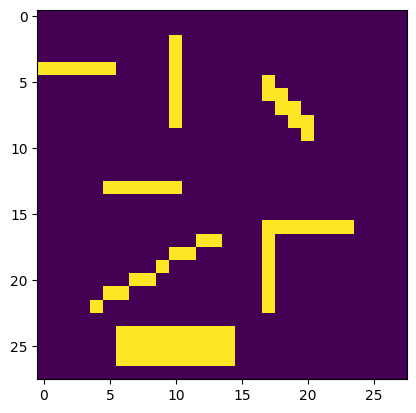

In [2]:
import torch
from matplotlib import image as mpimg
import matplotlib.pyplot as plt

img_ = mpimg.imread('data/test_cnn.png') # Den Pfad musst du ggf. anpassen.

img = img_ / 255
img_bw = 1 - img[:, :, 0]

plt.imshow(img_bw)
plt.show()

img_bw = torch.tensor(img_bw)

In `torch` können Faltungen in 2D mit der Funktion [`torch.conv2d`](https://pytorch.org/docs/stable/generated/torch.nn.functional.conv2d.html) durchgeführt werden. Dabei ist zu beachten, dass die Kernel, welche als `weight` bezeichnet werden, die Größe (Anzahl der Output Channel, Anzahl der Input Channel, Höhe, Breite) haben muss. Wenn wir nur jeweils einen Kanal haben, können wir einfach zusätzliche Dimensionen der Länge $1$ erzeugen, indem wir die Funktion [`torch.reshape`](https://pytorch.org/docs/stable/generated/torch.reshape.html?highlight=reshape#torch.reshape) verwenden.

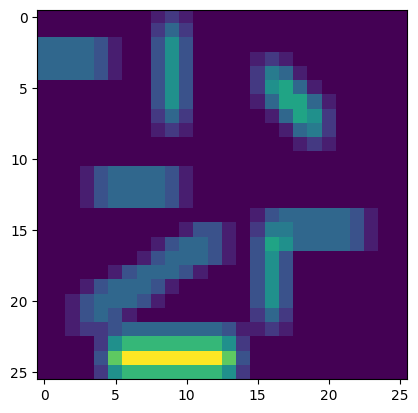

In [3]:
k = torch.tensor([[1., 2., 1.], 
                  [1., 2., 1.], 
                  [1., 2., 1.]])

h, w = img_bw.shape
k_h, k_w = k.shape

img_bw = img_bw.float()
conv = torch.conv2d(img_bw.reshape(1, 1,h, w), k.reshape(1, 1, k_h, k_w))
plt.imshow(conv.reshape(h - k_h + 1, w - k_w + 1))
plt.show()

**Frage** Was erkennt dieser Filter?

**Aufgabe** Finde Filter, die horizontale Linien, Ecken (in $x$-, in $y$-Richtung, sowie richtungsunabhängig), Kanten (aber keine Linien), ... erkennen.

**Aufgabe** Finde einen Kernel, mit dem du das Bild glätten kannst.

**Aufgabe** Ändere die Größe des Kernels und beobachte die Effekte.

**Aufgabe** Lade das Bild `'data/katze.jpg'` und wende die Filter darauf an, visualisiere die Ergebnisse.

## Pooling

In CNN's wechseln sich Convolutional Layer mit Pooling/Subsampling Layern ab. Ein Pooling Layer fasst mehrere Pixel zusammen, und komprimiert daher das Bild.

Er hat mehrere Funktionen:
- Overfitting vermeiden
- Rechenzeit sparen
- Robuster gegenüber Transformationen

![CNN](data/cnn.png)
https://commons.wikimedia.org/wiki/File:Typical_cnn.png by Aphex34

Das Zusammenfassen von Pixeln kann grundsätzlich auf zwei verschiedene Arten erfolgen:
- wir berechnen den Durschnittswert aller Pixel einer Region
- wir übernehmen die größte Aktivierung aller Pixel einer Region

In `pytorch` heißen diese Funktionen `MaxPool2d` bzw. `AvgPool2d`. Wir geben als Argument die Kernel-Größe an, d.h. die Seitenlänge der Region, die zusammengefasst werden soll.

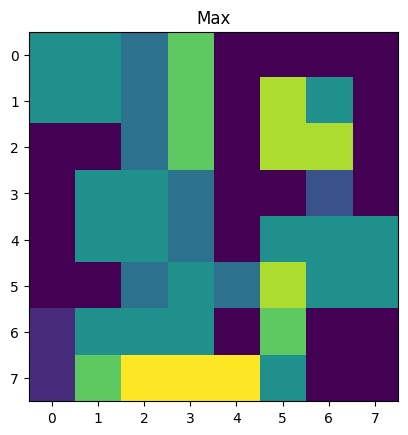

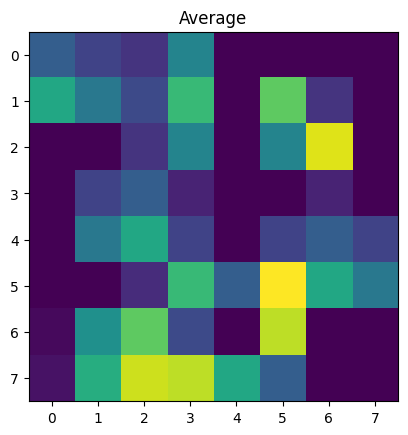

In [11]:
max_layer = torch.nn.MaxPool2d(3)
avg_layer = torch.nn.AvgPool2d(3)

max_pooled = max_layer(conv)
avg_pooled = avg_layer(conv)
plt.imshow(max_pooled[0,0])
plt.title('Max');
plt.show()
plt.title('Average');
plt.imshow(avg_pooled[0,0])
plt.show()

**Frage** Wie groß ist das Ergebnis des Pooling-Layers bei Kernelgröße $k$, Bildgröße $h \cdot w$?

In [7]:

print(max_pooled.shape)

torch.Size([1, 1, 8, 8])


In [9]:

print(conv.shape)

torch.Size([1, 1, 26, 26])


    print(maxa

**Aufgabe** Variiere die Kernelgröße und das Bild (z.B. Katze) und beobachte die Änderungen.

## CNNs

Ein typisches CNN ist aufgebaut aus alternierendend Schichten von Convolutions und Pooling (mit Aktivierungsfunktion dazwischen). Am Ende haben wir dann einen oder mehrere Fully Connected Layer.

In [30]:
net = torch.nn.Sequential(torch.nn.Conv2d(1, 8, 3, padding=1), 
                          torch.nn.ReLU(), 
                          torch.nn.Conv2d(8, 8, 3, padding=1),
                          torch.nn.ReLU(), 
                          torch.nn.AvgPool2d(2, 2), 
                          torch.nn.Conv2d(8, 16, 3, padding=1),
                          torch.nn.ReLU(),
                          torch.nn.Conv2d(16, 16, 3, padding=1),
                          torch.nn.ReLU(), 
                          torch.nn.AvgPool2d(2, 2),
                          torch.nn.Conv2d(16, 32, 3, padding=1),
                          torch.nn.ReLU(),
                          torch.nn.Conv2d(32, 32, 3, padding=1),
                          torch.nn.ReLU(),
                          torch.nn.Flatten(), 
                          torch.nn.Linear(7 * 7 * 32, 10))

Wie du siehst übergeben wir hier mehr Argumente an die Funktion `torch.nn.Conv2d`:
```
    torch.nn.Conv2d(
    in_channels,
    out_channels,
    kernel_size)
```

`out_channels` bezeichnet die Anzahl der Features bzw. Kernel, die wir in diesem Layer parallel lernen.
Wir können also in einem Layer nicht nur z.B. horizontale Linien, sondern viele Features auf einmal erkennen.
`in_channels` ist das gleiche auf der Eingabeseite: bei Farbbildern haben wir separate Kanäle für rot, grün und blau.

**Frage** Was macht der Layer `torch.nn.Flatten()`?

Wir können ganz einfach einen forward pass durch das Netzwerk berechnen: 

In [18]:
net(img_bw[None, None, ...])

tensor([[ 0.0269, -0.0156,  0.0081,  0.0284,  0.0111, -0.0212, -0.0028, -0.0169,
         -0.0212, -0.0204]], grad_fn=<AddmmBackward0>)

## Bonus: Faltung von Vektoren

### Aufgabe 1

In [22]:
a = net.parameters()

Nehmen wir an, dass wir einen Vektor der Länge $8$ und einen zweiten der Länge $3$ haben. Wie groß ist die Faltung der beiden Vektoren?

In [28]:
model_parameters = filter(lambda p: p.requires_grad, net.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])

In [29]:
import numpy as np

params

33730

_Hier kannst du deine Lösung hinschreiben._

### Aufgabe 2

Wie sieht es aus, wenn ein Vektor die Länge $12$ und der andere die Länge $6$ hat?

### Aufgabe 3

Gegeben seien zwei Vektoren der Länge $20$ und $3$, wobei wir den ersten Vektor um $2$ in jede Richtung padden. Wir groß ist der Output?

### Aufgabe 4

Wie muss man einen Vektor der Länge $15$ padden, dass der Output der Faltung mit einem Kernel der Länge $4$ wieder die Länge des ursprünglichen Vektors haben soll?

### Aufgabe 5

Der Vektor habe die Länge $10$ und der Kernel ist $2$ lang. Wir verwenden ein Stride von $2$. Wie groß ist der Output?

### Aufgabe 6

Nun habe der Vektor die Länge $14$, der Kernel die Länge $5$, wir padden auf jeder Seite um $3$ und verwenden ein Stride von $4$. Wie groß ist der Output?

### Aufgabe 7

Finde eine allgemeine Formel, um die Länge des Outputs $o$ zu berechnen, wenn die Länge des Vektors $n$, die des Kernels $k$, das Padding $p_1$ und $p_2$ und das Stride $s$ ist.

### Aufgabe 8

Von nun an werden wir die Funktion [`np.convolve`](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html) verwenden. Falte den Vektor mit den angegebenen Kerneln und visualisiere die Resultate, um deren Effekt zu verstehen. Kannst du die Kernel kombinieren, um den Punkt mit dem größten Anstieg zu finden?

In [3]:
from matplotlib import pyplot as plt
import numpy as np

v = np.tanh(np.linspace(-5, 5)) + 0.05 * np.sin(np.linspace(-40, 40))

k1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
k2 = np.array([1, 0, -1])
k3 = np.array([-1, 2, -1])
k4 = np.array([0.2, 0.6, 1, 0.6, 0.2])
k4 = k4 / np.sum(k4)

out = np.convolve(v, k1)
